In [ ]:
!pip install accelerate evaluate scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install transformers==4.45.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 103.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.0
    Uninstalling tokenizers-0.21.0:
      Successfully uninstalled tokenizers-0.21.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.3
    Uninstalling transformers-4.48.3:
      Successfully uninstalled transformers-4.48.3


In [ ]:
pip install -U datasets

In [ ]:
pip install --upgrade huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.1/512.1 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 121.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.28.1
    Uninstalling huggingface-hub-0.28.1:
      Successfully uninstalled huggingface-hub-0.28.1


In [ ]:
from huggingface_hub import login
login()

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "bigscience/bloom-560m"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=3  # For NLI: entailment, contradiction, neutral
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/222 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/693 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of BloomForSequenceClassification were not initialized from the model checkpoint at bigscience/bloom-560m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from datasets import load_dataset

# Load XNLI English training set
xnli_en = load_dataset("facebook/xnli", name="en", split="train")
xnli_en = xnli_en.shuffle(seed=42).select(range(50000))

# Load XNLI validation set and filter French samples
xnli_fr = load_dataset("facebook/xnli", name="fr", split="test")

# Load Kannada from IndicXNLI
indic_kn = load_dataset("Divyanshu/indicxnli", name="kn", split="test")

README.md:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

en/train-00000-of-00001.parquet:   0%|          | 0.00/50.2M [00:00<?, ?B/s]

en/test-00000-of-00001.parquet:   0%|          | 0.00/308k [00:00<?, ?B/s]

en/validation-00000-of-00001.parquet:   0%|          | 0.00/157k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5010 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2490 [00:00<?, ? examples/s]

fr/train-00000-of-00001.parquet:   0%|          | 0.00/55.4M [00:00<?, ?B/s]

fr/test-00000-of-00001.parquet:   0%|          | 0.00/360k [00:00<?, ?B/s]

fr/validation-00000-of-00001.parquet:   0%|          | 0.00/183k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5010 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2490 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/5.85k [00:00<?, ?B/s]

indicxnli.py:   0%|          | 0.00/4.43k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/77.9M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/511k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/256k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5010 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2490 [00:00<?, ? examples/s]

In [ ]:
def tokenize(example):
    return tokenizer(example['premise'], example['hypothesis'], truncation=True, padding='max_length', max_length=128)

# English training
xnli_en = xnli_en.filter(lambda x: x["label"] != -1)
xnli_en = xnli_en.map(tokenize, batched=True)
xnli_en.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# French test
xnli_fr = xnli_fr.filter(lambda x: x["label"] != -1)
xnli_fr = xnli_fr.map(tokenize, batched=True)
xnli_fr.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# Kannada test
indic_kn = indic_kn.filter(lambda x: x["label"] != -1)
indic_kn = indic_kn.map(tokenize, batched=True)
indic_kn.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

Filter:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5010 [00:00<?, ? examples/s]

Map:   0%|          | 0/5010 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5010 [00:00<?, ? examples/s]

Map:   0%|          | 0/5010 [00:00<?, ? examples/s]

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./bloom_results",
    eval_strategy="no",
    save_strategy="no",
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    load_best_model_at_end=False,
    report_to="none"
)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="weighted")
    }

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=xnli_en,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

Step,Training Loss
100,2.909800
200,1.395400
300,1.325800
400,1.268400
500,1.214600
600,1.167200
700,1.167400
800,1.074000
900,1.183000
1000,1.030600


TrainOutput(global_step=12500, training_loss=0.7284825112915039, metrics={'train_runtime': 2397.8862, 'train_samples_per_second': 41.703, 'train_steps_per_second': 5.213, 'total_flos': 2.32179105792e+16, 'train_loss': 0.7284825112915039, 'epoch': 2.0})

In [ ]:
# French Evaluation
print("📘 Evaluating on French:")
fr_results = trainer.evaluate(xnli_fr)
print(fr_results)

# Kannada Evaluation
print("📙 Evaluating on Kannada:")
kn_results = trainer.evaluate(indic_kn)
print(kn_results)


📘 Evaluating on French:


{'eval_loss': 0.7606381177902222, 'eval_accuracy': 0.7227544910179641, 'eval_f1': 0.7240159583375438, 'eval_runtime': 32.1633, 'eval_samples_per_second': 155.768, 'eval_steps_per_second': 9.763, 'epoch': 2.0}
📙 Evaluating on Kannada:
{'eval_loss': 1.0471552610397339, 'eval_accuracy': 0.590818363273453, 'eval_f1': 0.589862157252178, 'eval_runtime': 32.1083, 'eval_samples_per_second': 156.034, 'eval_steps_per_second': 9.779, 'epoch': 2.0}


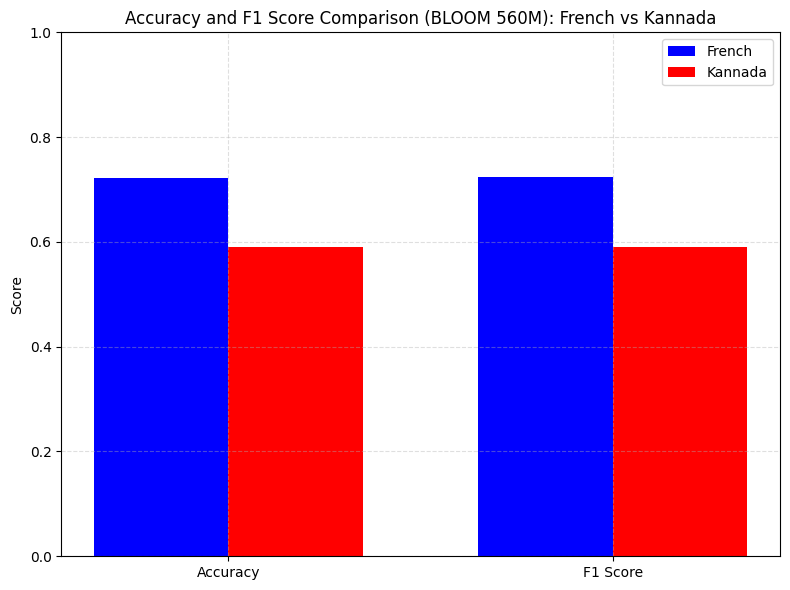

In [ ]:
accuracy = [0.72275, 0.59081]
f1_scores = [0.72401, 0.58986]

import matplotlib.pyplot as plt

# Metrics
metrics = ['Accuracy', 'F1 Score']
french_scores = [0.72275, 0.72401]
kannada_scores = [0.59081, 0.58986]

x = range(len(metrics))
bar_width = 0.35

plt.figure(figsize=(8, 6))

# French bars
plt.bar([i - bar_width/2 for i in x], french_scores, width=bar_width, label='French', color='blue')

# Kannada bars
plt.bar([i + bar_width/2 for i in x], kannada_scores, width=bar_width, label='Kannada', color='red')

# Labels and formatting
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Accuracy and F1 Score Comparison (BLOOM 560M): French vs Kannada")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
output_dir = "./bloom560M_nli_50k_2e"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

('./bloom560M_nli_50k_2e/tokenizer_config.json',
 './bloom560M_nli_50k_2e/special_tokens_map.json',
 './bloom560M_nli_50k_2e/tokenizer.json')

In [ ]:
!zip -r bloom560M_nli_50k_2e.zip bloom560M_nli_50k_2e

  adding: bloom560M_nli_50k_2e/ (stored 0%)
  adding: bloom560M_nli_50k_2e/special_tokens_map.json (deflated 79%)
  adding: bloom560M_nli_50k_2e/tokenizer_config.json (deflated 73%)
  adding: bloom560M_nli_50k_2e/model.safetensors (deflated 18%)
  adding: bloom560M_nli_50k_2e/config.json (deflated 52%)
  adding: bloom560M_nli_50k_2e/tokenizer.json (deflated 79%)


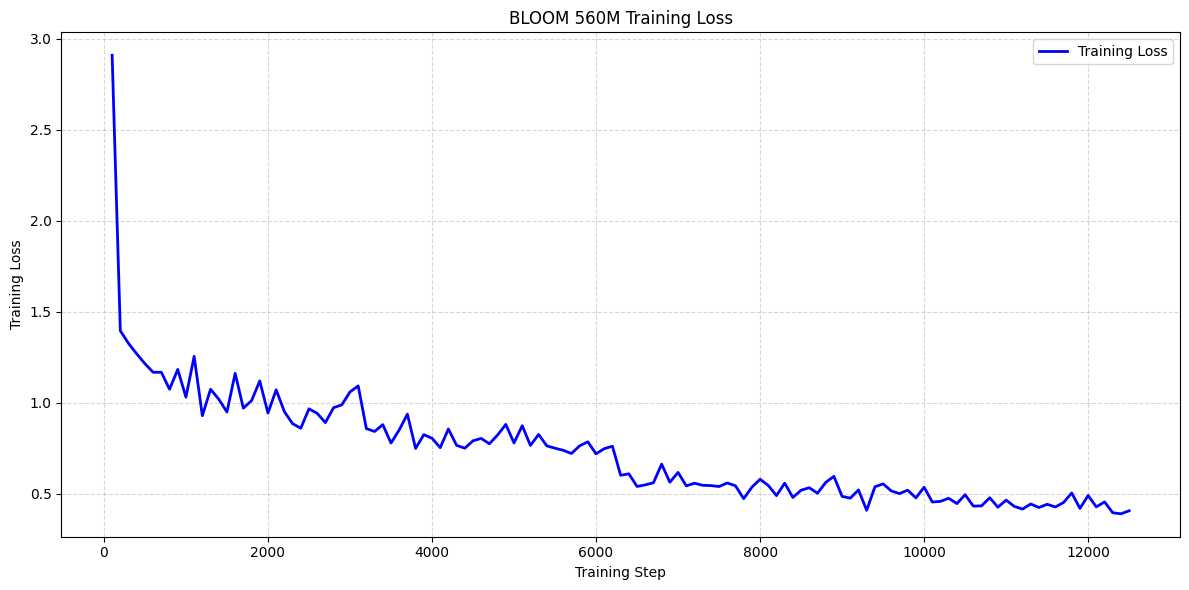

In [2]:
import matplotlib.pyplot as plt

# Step and training loss data
steps = list(range(100, 12501, 100))

losses = [
    2.9098, 1.3954, 1.3258, 1.2684, 1.2146, 1.1672, 1.1674, 1.074, 1.183, 1.0306, 1.2547, 0.9286,
    1.074, 1.0194, 0.9488, 1.1613, 0.9702, 1.0113, 1.1195, 0.9429, 1.0709, 0.9512, 0.8847, 0.8597,
    0.9662, 0.9415, 0.8907, 0.9727, 0.9881, 1.0592, 1.0923, 0.8578, 0.842, 0.8796, 0.7784, 0.8501,
    0.937, 0.7486, 0.8244, 0.8046, 0.7529, 0.8555, 0.7657, 0.7499, 0.7907, 0.8038, 0.7741, 0.8226,
    0.8806, 0.7788, 0.8735, 0.7652, 0.8255, 0.7627, 0.7499, 0.7383, 0.7208, 0.763, 0.785, 0.719,
    0.7472, 0.7608, 0.6011, 0.6092, 0.5397, 0.5482, 0.56, 0.6626, 0.563, 0.6168, 0.543, 0.5575,
    0.546, 0.5444, 0.5394, 0.5589, 0.5434, 0.4727, 0.5354, 0.5793, 0.5451, 0.4893, 0.5577, 0.4793,
    0.519, 0.5327, 0.5024, 0.5617, 0.5954, 0.4854, 0.4753, 0.5205, 0.4086, 0.5376, 0.5539, 0.5151,
    0.5005, 0.5191, 0.477, 0.5353, 0.4543, 0.4578, 0.4747, 0.4454, 0.4943, 0.4318, 0.4329, 0.4776,
    0.4255, 0.4646, 0.43, 0.4154, 0.4434, 0.4237, 0.4417, 0.4269, 0.4513, 0.5039, 0.4191, 0.4898,
    0.4272, 0.4547, 0.3952, 0.3894, 0.4061
]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(steps, losses, label='Training Loss', color='blue', linewidth=2)
plt.xlabel('Training Step')
plt.ylabel('Training Loss')
plt.title('BLOOM 560M Training Loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()